# SOCCOM Float Analysis

Data downloaded from: https://soccompu.princeton.edu/www/index.html (High res, NetCDF)

Note: (High res, NetCDF). Need to decide which method is you want to use and download that NetCDF.


In [1]:
# Imports
import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np
import csv

### Set path to where the data lives locally

In [8]:
path =  '/Users/Jocelyne/Desktop/Floats/'
# Make a list of the file names
files = glob.glob(path+'*.nc')
files[0]

'/Users/Jocelyne/Desktop/Floats/5904675_HRQC.nc'

### Load the a file and take a peak at the contents of the file

In [9]:
ds = xr.open_dataset(files[0])
ds

<xarray.Dataset>
Dimensions:              (NPARAMETER: 46, N_LEVELS: 559, N_PROF: 140)
Dimensions without coordinates: NPARAMETER, N_LEVELS, N_PROF
Data variables: (12/66)
    Cruise               |S11 ...
    Station              (N_PROF) int32 ...
    Lon                  (N_PROF) float64 ...
    Lat                  (N_PROF) float64 ...
    Lat_QF               (N_PROF) |S1 ...
    Lat_QFA              (N_PROF) float64 ...
    ...                   ...
    Type                 |S1 ...
    mon_day_yr           (N_PROF) |S10 ...
    hh_mm                (N_PROF) |S5 ...
    Parameters           (NPARAMETER) |S19 ...
    JULD                 (N_PROF) datetime64[ns] ...
    REFERENCE_DATE_TIME  object ...
Attributes:
    Comments:  \n//0\n//<Encoding>UTF-8</Encoding>\n//File updated on 05/01/2...

### Make a plot of some temperature data just to see what we're working with

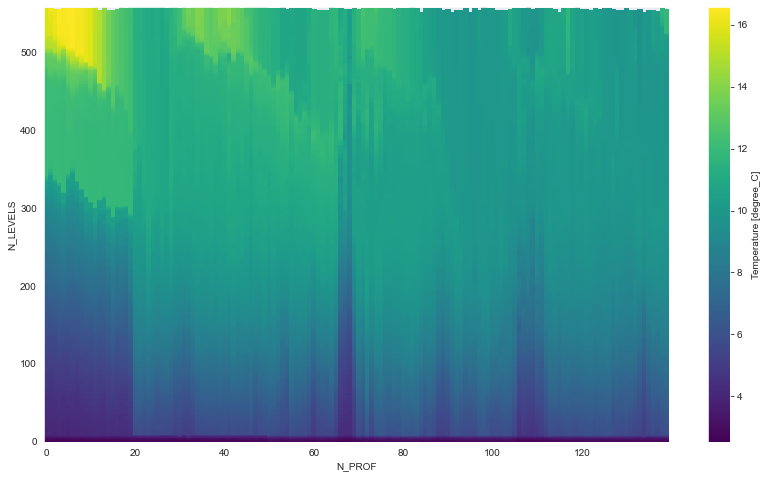

In [62]:
fig = plt.figure(figsize=(14,8))
ds.Temperature.transpose().plot() # Note: Need to transpose (rotate) the data so it is oriented correctly

### This is a little data exploration
Loop through files and print out the sum of all the "pHinsitu" values in that file. This is a clunky way to do this but my thought process here is that if there is a value of 0, then there may be no pH data for that file.

I also looped through and printed out the first timestamp from each of the files to get a sense of the data ranges of files we're working with. Again, this is probably clunky but for a quick peak at the data, it works.

In [79]:
ind = np.empty([len(files)])

for x in np.arange(0,len(files)):
    ds = xr.open_dataset(files[x])
    
    #print(np.nansum(ds.pHinsitu.values))
    #print(ds.mon_day_yr.values[0])
    print(ds.mon_day_yr.values[-1])

    
    ind[x] = np.nansum(ds.pHinsitu.values)
    
    


b'12/19/2019'
b'05/02/2021'
b'05/04/2021'
b'04/28/2021'
b'05/02/2021'
b'04/30/2021'
b'03/27/2021'
b'03/15/2021'
b'06/26/2020'
b'10/13/2020'
b'09/24/2020'
b'04/12/2019'
b'08/25/2020'
b'05/01/2021'
b'04/10/2021'
b'01/21/2021'
b'03/29/2017'
b'05/05/2021'
b'04/26/2021'
b'04/30/2021'
b'08/05/2018'
b'04/25/2021'
b'07/23/2017'
b'04/09/2021'
b'03/25/2019'
b'05/02/2021'
b'05/24/2019'
b'04/28/2021'
b'04/30/2021'
b'04/12/2021'
b'07/14/2020'
b'03/19/2020'
b'06/07/2019'
b'04/26/2021'
b'08/24/2020'
b'02/19/2020'
b'10/31/2020'
b'01/16/2019'
b'03/02/2016'
b'04/26/2021'
b'05/22/2019'
b'06/04/2018'
b'05/04/2021'
b'04/27/2020'
b'02/12/2020'
b'08/15/2020'
b'07/16/2020'
b'08/23/2020'
b'12/07/2020'
b'04/30/2020'
b'04/29/2021'
b'11/23/2020'
b'10/24/2020'
b'05/05/2021'
b'05/09/2017'
b'11/06/2017'
b'04/14/2021'
b'04/26/2021'
b'06/07/2019'
b'05/04/2021'
b'09/19/2020'
b'12/04/2020'
b'02/21/2020'
b'08/11/2020'
b'04/29/2021'
b'04/19/2021'
b'04/27/2021'
b'09/10/2017'
b'04/07/2021'
b'09/26/2019'
b'01/10/2021'
b'05/0

In [89]:
# != this means is not equal to
file_num = np.where(ind!=0)
file_num
len(files)

151

In [94]:
ind = np.empty([len(files)])

for x in np.arange(0,len(files)):
    ds = xr.open_dataset(files[x])
    
    #print(np.nansum(ds.pHinsitu.values))
    #print(ds.mon_day_yr.values[0])
    print(ds.mon_day_yr.values[-1])

    
    ind[x] = np.nansum(ds.pHinsitu.values)
    print(np.nansum(ds.pHinsitu.values))
    
    


b'12/19/2019'
75436.3073
b'05/02/2021'
64008.407300000006
b'05/04/2021'
0.0
b'04/28/2021'
25667.202
b'05/02/2021'
347861.96359999996
b'04/30/2021'
0.0
b'03/27/2021'
70612.296
b'03/15/2021'
-30849.1497
b'06/26/2020'
0.0
b'10/13/2020'
114050.5151
b'09/24/2020'
0.0
b'04/12/2019'
80440.95390000001
b'08/25/2020'
266915.2034
b'05/01/2021'
70524.713
b'04/10/2021'
38402.9225
b'01/21/2021'
1533145.2498
b'03/29/2017'
405158.5336
b'05/05/2021'
0.0
b'04/26/2021'
58762.08849999999
b'04/30/2021'
-55337.84820000001
b'08/05/2018'
12522.8953
b'04/25/2021'
27611.4679
b'07/23/2017'
54461.952099999995
b'04/09/2021'
46287.1918
b'03/25/2019'
130988.84800000001
b'05/02/2021'
39011.6611
b'05/24/2019'
4724.4177
b'04/28/2021'
44050.236300000004
b'04/30/2021'
0.0
b'04/12/2021'
0.0
b'07/14/2020'
70321.15070000001
b'03/19/2020'
531.46
b'06/07/2019'
185503.6433
b'04/26/2021'
25037.8755
b'08/24/2020'
51558.9372
b'02/19/2020'
314567.4833
b'10/31/2020'
102960.359
b'01/16/2019'
16365.3126
b'03/02/2016'
522096.1664
b'04

In [95]:
ind = np.empty([len(files)])

for x in np.arange(0,len(files)):
    ds = xr.open_dataset(files[x])
    
    #print(np.nansum(ds.pHinsitu.values))
    #print(ds.mon_day_yr.values[0])
    print(ds.mon_day_yr.values[-1])

    
    ind[x] = np.nansum(ds.pHinsitu.values)
    print(np.nansum(ds.pHinsitu.values))
    print(ds.mon_day_yr.values[0])
    


b'12/19/2019'
75436.3073
b'01/13/2016'
b'05/02/2021'
64008.407300000006
b'03/10/2019'
b'05/04/2021'
0.0
b'02/16/2018'
b'04/28/2021'
25667.202
b'01/30/2020'
b'05/02/2021'
347861.96359999996
b'12/23/2018'
b'04/30/2021'
0.0
b'01/17/2018'
b'03/27/2021'
70612.296
b'01/13/2017'
b'03/15/2021'
-30849.1497
b'04/08/2018'
b'06/26/2020'
0.0
b'01/25/2018'
b'10/13/2020'
114050.5151
b'01/22/2018'
b'09/24/2020'
0.0
b'12/10/2019'
b'04/12/2019'
80440.95390000001
b'01/18/2015'
b'08/25/2020'
266915.2034
b'03/06/2016'
b'05/01/2021'
70524.713
b'09/21/2017'
b'04/10/2021'
38402.9225
b'04/19/2019'
b'01/21/2021'
1533145.2498
b'02/15/2016'
b'03/29/2017'
405158.5336
b'01/24/2016'
b'05/05/2021'
0.0
b'01/15/2021'
b'04/26/2021'
58762.08849999999
b'04/18/2018'
b'04/30/2021'
-55337.84820000001
b'02/07/2018'
b'08/05/2018'
12522.8953
b'12/28/2017'
b'04/25/2021'
27611.4679
b'12/07/2019'
b'07/23/2017'
54461.952099999995
b'01/28/2015'
b'04/09/2021'
46287.1918
b'12/27/2018'
b'03/25/2019'
130988.84800000001
b'01/12/2017'
b'0

In [109]:
path = '/Users/Jocelyne/Desktop/Floats'
files = glob.glob(path+'*.nc')
Float_data= 'files'
if Float_data = 0: 
print('Float_Name')
else:
print('pH Float')


SyntaxError: invalid syntax (<ipython-input-109-278ec6ec1b0b>, line 4)

In [100]:
data.xr.open_dataset('5904183_HRQC.nc')
data


NameError: name 'data' is not defined